Data Analysis and data plotting ideas for cookie cats dataset

In [66]:
import pandas as pd

# Load the uploaded CSV file
# file_path = r'C:\Users\Lachu\OneDrive\Documents\Visual Studio 2019\cookie_cats_changed2.csv'
file_path = r'C:\Users\Lachu\Downloads\cookie_cats.csv'
data = pd.read_csv(file_path)

# Display the first few rows and structure of the data
print(data.head())
print(data.columns)


   userid  version  sum_gamerounds  retention_1  retention_7
0     116  gate_30               3        False        False
1     337  gate_30              38         True        False
2     377  gate_40             165         True        False
3     483  gate_40               1        False        False
4     488  gate_40             179         True         True
Index(['userid', 'version', 'sum_gamerounds', 'retention_1', 'retention_7'], dtype='object')


In [68]:
data.shape

(90189, 5)

In [69]:
data.dtypes

userid             int64
version           object
sum_gamerounds     int64
retention_1         bool
retention_7         bool
dtype: object

In [70]:
data.describe

<bound method NDFrame.describe of         userid  version  sum_gamerounds  retention_1  retention_7
0          116  gate_30               3        False        False
1          337  gate_30              38         True        False
2          377  gate_40             165         True        False
3          483  gate_40               1        False        False
4          488  gate_40             179         True         True
...        ...      ...             ...          ...          ...
90184  9999441  gate_40              97         True        False
90185  9999479  gate_40              30        False        False
90186  9999710  gate_30              28         True        False
90187  9999768  gate_40              51         True        False
90188  9999861  gate_40              16        False        False

[90189 rows x 5 columns]>

In [71]:
user_zerorounds = data.loc[(data['sum_gamerounds'] == 0)]
user_zerorounds.count()

userid            3994
version           3994
sum_gamerounds    3994
retention_1       3994
retention_7       3994
dtype: int64

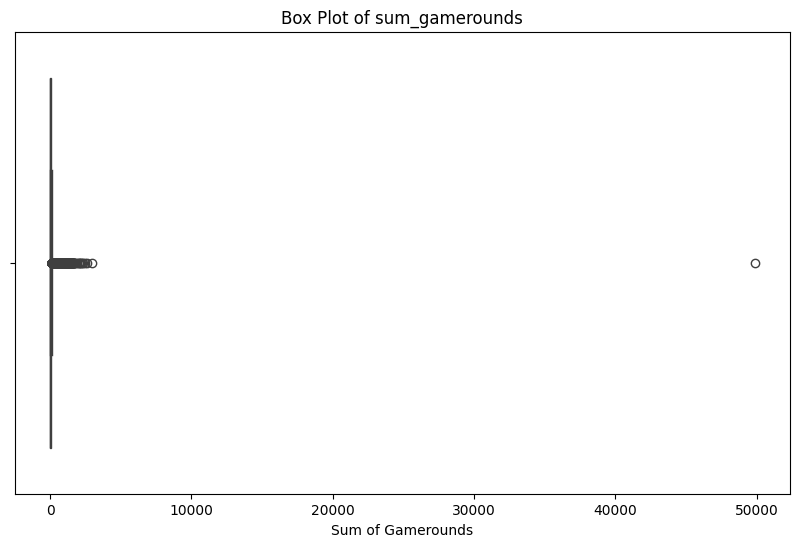

In [72]:
#plotting the sum_gamerounds to identify the null values


import matplotlib.pyplot as plt
import seaborn as sns

# Create a box plot for sum_gamerounds
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['sum_gamerounds'])
plt.title('Box Plot of sum_gamerounds')
plt.xlabel('Sum of Gamerounds')
plt.show()

In [73]:
#Dropping the extreme outlier value 
filtered_data = data[data['sum_gamerounds'] < 10000]


In [74]:
# Set the lower and upper limits for sum_gamerounds
lower_limit = 1
upper_limit = 3000

# Filter the data within the specified range and create a copy to avoid SettingWithCopyWarning
gamerounds_in_range = data[(data['sum_gamerounds'] >= lower_limit) & (data['sum_gamerounds'] <= upper_limit)].copy()

# Calculate mean and median of sum_gamerounds
mean_gamerounds = gamerounds_in_range['sum_gamerounds'].mean()
median_gamerounds = gamerounds_in_range['sum_gamerounds'].median()

# function to categorize engagement based on mean and median values
def categorize_engagement(rounds):
    if rounds < 0.5 * median_gamerounds:
        return 'Low Engagement'
    elif 0.5 * median_gamerounds <= rounds < median_gamerounds:
        return 'Moderate Engagement'
    elif median_gamerounds <= rounds < mean_gamerounds:
        return 'High Engagement'
    else:
        return 'Very High Engagement'

# Apply the categorization and a new column engagement level
gamerounds_in_range.loc[:, 'engagement_level'] = gamerounds_in_range['sum_gamerounds'].apply(categorize_engagement)

# Display a sample of the modified DataFrame
gamerounds_in_range.head(15)

,userid,version,sum_gamerounds,retention_1,retention_7,engagement_level
0,116,gate_30,3,False,False,Low Engagement
1,337,gate_30,38,True,False,High Engagement
2,377,gate_40,165,True,False,Very High Engagement
3,483,gate_40,1,False,False,Low Engagement
4,488,gate_40,179,True,True,Very High Engagement
5,540,gate_40,187,True,True,Very High Engagement
7,1444,gate_40,2,False,False,Low Engagement
8,1574,gate_40,108,True,True,Very High Engagement
9,1587,gate_40,153,True,False,Very High Engagement
10,1842,gate_40,3,False,True,Low Engagement


In [77]:
# Counting the number of players for each number of game rounds 
plot_df = data.groupby('sum_gamerounds')['userid'].count()
plot_df

sum_gamerounds
0        3994
1        5538
2        4606
3        3958
4        3629
         ... 
2294        1
2438        1
2640        1
2961        1
49854       1
Name: userid, Length: 942, dtype: int64

In [ ]:
# Set the lower and upper limits for sum_gamerounds
lower_limit = 1
upper_limit = 3000
# filtering data with in the limit

gamerounds_in_range_percentile = data[(data['sum_gamerounds'] >= lower_limit) & (data['sum_gamerounds'] <= upper_limit)].copy()


# Calculate percentiles
q1 = gamerounds_in_range_percentile['sum_gamerounds'].quantile(0.25)
q2 = gamerounds_in_range_percentile['sum_gamerounds'].quantile(0.50)  # Median
q3 = gamerounds_in_range_percentile['sum_gamerounds'].quantile(0.75)

# function to categorize engagement based on percentiles
def categorize_engagement_percentiles(rounds):
    if rounds < q1:
        return 'Low Engagement'
    elif q1 <= rounds < q2:
        return 'Moderate Engagement'
    elif q2 <= rounds < q3:
        return 'High Engagement'
    else:
        return 'Very High Engagement'

# Apply the new categorization
gamerounds_in_range_percentile['engagement_level_percentile'] = gamerounds_in_range_percentile['sum_gamerounds'].apply(categorize_engagement_percentiles)
gamerounds_in_range_percentile

,userid,version,sum_gamerounds,retention_1,retention_7,engagement_level_percentile
0,116,gate_30,3,0,0,Low Engagement
1,337,gate_30,38,1,0,High Engagement
2,377,gate_40,165,1,0,Very High Engagement
3,483,gate_40,1,0,0,Low Engagement
4,488,gate_40,179,1,1,Very High Engagement
...,...,...,...,...,...,...
90184,9999441,gate_40,97,1,0,Very High Engagement
90185,9999479,gate_40,30,0,0,High Engagement
90186,9999710,gate_30,28,1,0,High Engagement
90187,9999768,gate_40,51,1,0,High Engagement


Text(0, 0.5, 'User Count')

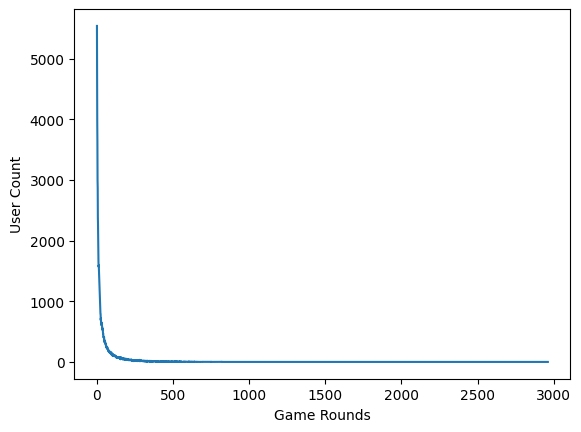

In [93]:
%matplotlib inline

# Counting the number of players for each number of game rounds 
plot_df = gamerounds_in_range.groupby('sum_gamerounds')['userid'].count()

# Plotting the distribution of players that played 0 to 100 game rounds
ax = plot_df.head(n=3000).plot(x="sum_gamerounds", y="userid")
ax.set_xlabel("Game Rounds")
ax.set_ylabel("User Count")

In [92]:
# Count the number of players in each category for both methods
mean_median_counts = gamerounds_in_range.groupby('engagement_level').size()
percentile_counts = gamerounds_in_range_percentile.groupby('engagement_level_percentile').size()  # If you use percentiles

# Combine both into a single table
comparison_table = pd.DataFrame({
    'Mean/Median-Based': mean_median_counts,
    'Percentile-Based': percentile_counts
})

print(comparison_table)


                      Mean/Median-Based  Percentile-Based
High Engagement                   22029             22029
Low Engagement                    28230             20723
Moderate Engagement               14159             21666
Very High Engagement              21776             21776


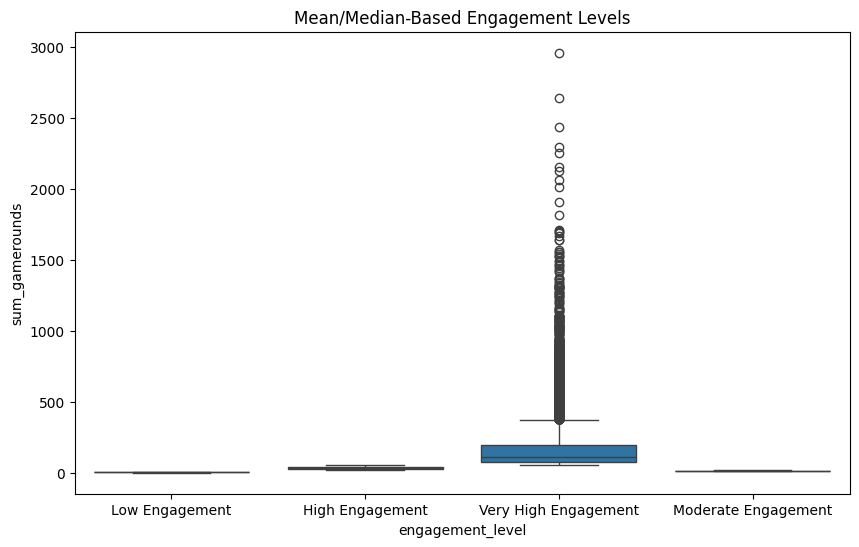

ValueError: Could not interpret value `percentile_engagement_level` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

In [52]:
import seaborn as sns

# Mean/Median-Based Engagement Levels
plt.figure(figsize=(10, 6))
sns.boxplot(data=gamerounds_in_range, x='engagement_level', y='sum_gamerounds')
plt.title('Mean/Median-Based Engagement Levels')
plt.show()

# Percentile-Based Engagement Levels
plt.figure(figsize=(10, 6))
sns.boxplot(data=gamerounds_in_range, x='percentile_engagement_level', y='sum_gamerounds')
plt.title('Percentile-Based Engagement Levels')
plt.show()



In [82]:
import pandas as pd

# Analysis 1: Average sum_gamerounds by retention status
retention_summary = data.groupby(['retention_1', 'retention_7'])['sum_gamerounds'].mean().reset_index()
print("Average Rounds Played by Retention Status:")
print(retention_summary)



# Analysis 3: Retention rates by engagement level
engagement_retention = gamerounds_in_range.groupby('engagement_level')[['retention_1', 'retention_7']].mean().reset_index()
print("\nRetention Rates by Engagement Level:")
print(engagement_retention)


Average Rounds Played by Retention Status:
   retention_1  retention_7  sum_gamerounds
0        False        False       11.867283
1        False         True       88.031675
2         True        False       49.861555
3         True         True      187.043089

Retention Rates by Engagement Level:
       engagement_level  retention_1  retention_7
0       High Engagement     0.616188     0.148123
1        Low Engagement     0.106837     0.017109
2   Moderate Engagement     0.333428     0.051416
3  Very High Engagement     0.861269     0.563786


In [81]:
# Filter players who never came back
never_returned_players = data[(data['retention_1'] == False) & (data['retention_7'] == False)]

# Group by version and count the players who dropped
dropped_by_version = never_returned_players.groupby('version').size()

# Display the counts for each version
print(dropped_by_version)

# Find the version with the maximum drops
max_drops_version = dropped_by_version.idxmax()
print(f"The version with the maximum player drops is: {max_drops_version} with {dropped_by_version[max_drops_version]} drops.")


version
gate_30    22840
gate_40    23597
dtype: int64
The version with the maximum player drops is: gate_40 with 23597 drops.


In [57]:
# Filter for version 30
version_30_data = data[data['version'] == 'gate_30']

# Calculate retention rates for day 1 and day 7
retention_day_1_rate = version_30_data['retention_1'].mean()
retention_day_7_rate = version_30_data['retention_7'].mean()

# Display the retention rates
print(f"Retention rate on Day 1 for Version 30: {retention_day_1_rate:.2%}")
print(f"Retention rate on Day 7 for Version 30: {retention_day_7_rate:.2%}")


Retention rate on Day 1 for Version 30: 44.82%
Retention rate on Day 7 for Version 30: 19.02%


In [61]:
# Filter for version 40
version_40_data = data[data['version'] == 'gate_40']

# Calculate retention rates for day 1 and day 7
retention_day_1_rate_40 = version_40_data['retention_1'].mean()
retention_day_7_rate_40= version_40_data['retention_7'].mean()

# Display the retention rates
print(f"Retention rate on Day 1 for Version 40: {retention_day_1_rate_40:.2%}")
print(f"Retention rate on Day 7 for Version 40: {retention_day_7_rate_40:.2%}")


Retention rate on Day 1 for Version 40: 44.23%
Retention rate on Day 7 for Version 40: 18.20%


In [70]:
# Retention counts for Day 1
print("Day 1 Retention Counts for Version 30:")
print(version_30_data['retention_1'].value_counts())

# Retention counts for Day 7
print("Day 7 Retention Counts for Version 30:")
print(version_30_data['retention_7'].value_counts())


Day 1 Retention Counts for Version 30:
retention_1
0    24666
1    20034
Name: count, dtype: int64
Day 7 Retention Counts for Version 30:
retention_7
0    36198
1     8502
Name: count, dtype: int64


In [52]:
# Retention counts for Day 1
print("Day 1 Retention Counts for Version 40:")
print(version_40_data['retention_1'].value_counts())

# Retention counts for Day 7
print("Day 7 Retention Counts for Version 40:")
print(version_40_data['retention_7'].value_counts())


Day 1 Retention Counts for Version 40:
retention_1
False    25370
True     20119
Name: count, dtype: int64
Day 7 Retention Counts for Version 40:
retention_7
False    37210
True      8279
Name: count, dtype: int64


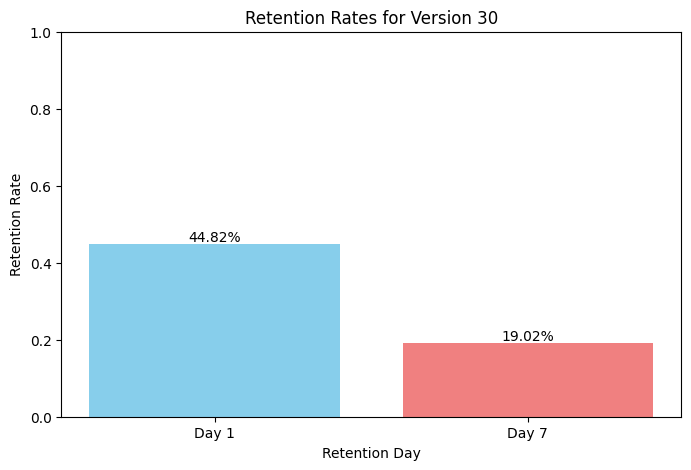

In [ ]:
import matplotlib.pyplot as plt

# Bar plot of retention rates
retention_rates = [retention_day_1_rate, retention_day_7_rate]
days = ['Day 1', 'Day 7']

plt.figure(figsize=(8, 5))
bars = plt.bar(days, retention_rates, color=['skyblue', 'lightcoral'])
plt.xlabel("Retention Day")
plt.ylabel("Retention Rate")
plt.title("Retention Rates for Version 30")
plt.ylim(0, 1)  # Set y-axis from 0 to 100% for clarity
plt.xticks(rotation=0)

# Annotate each bar with its value
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.2%}", ha='center', va='bottom')

plt.show()


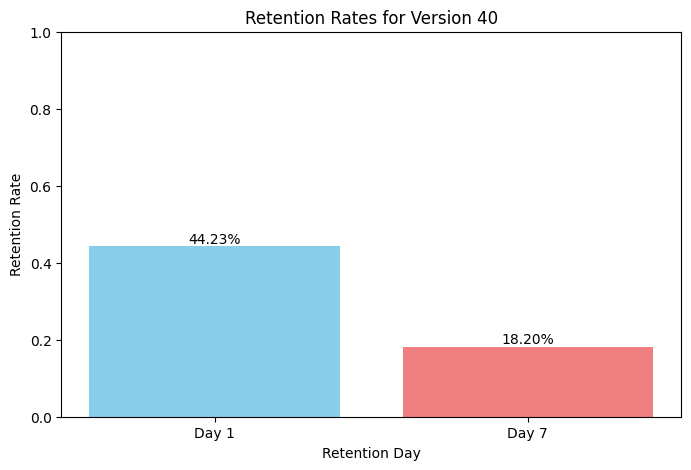

In [59]:
import matplotlib.pyplot as plt

# Bar plot of retention rates
retention_rates_40 = [retention_day_1_rate_40, retention_day_7_rate_40]
days = ['Day 1', 'Day 7']

plt.figure(figsize=(8, 5))
bars = plt.bar(days, retention_rates_40, color=['skyblue', 'lightcoral'])
plt.xlabel("Retention Day")
plt.ylabel("Retention Rate")
plt.title("Retention Rates for Version 40")
plt.ylim(0, 1)  # Set y-axis from 0 to 100% for clarity
plt.xticks(rotation=0)

# Annotate each bar with its value
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.2%}", ha='center', va='bottom')

plt.show()


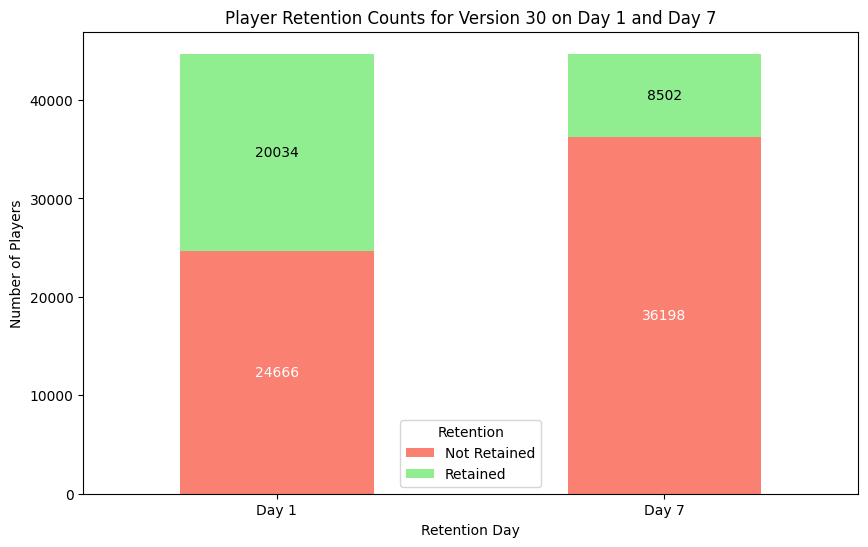

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming version_30_data is already defined and contains the columns retention_1 and retention_7

# Calculate retention counts for each day
retention_counts_30 = version_30_data[['retention_1', 'retention_7']].apply(pd.Series.value_counts).T
retention_counts_30.index = ['Day 1', 'Day 7']

# Plot the grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))
retention_counts_30.plot(kind='bar', stacked=True, color=['salmon', 'lightgreen'], ax=ax)
plt.xlabel("Retention Day")
plt.ylabel("Number of Players")
plt.title("Player Retention Counts for Version 30 on Day 1 and Day 7")
plt.xticks(rotation=0)
plt.legend(title="Retention", labels=["Not Retained", "Retained"])

# Add annotations to each bar segment
for i, day in enumerate(retention_counts_30.index):
    not_retained = retention_counts_30.loc[day, 0]
    retained = retention_counts_30.loc[day, 1]
    # Not retained segment
    ax.text(i, not_retained / 2, str(int(not_retained)), ha='center', va='center', color='white')
    # Retained segment
    ax.text(i, not_retained + retained / 2, str(int(retained)), ha='center', va='center', color='black')

plt.show()


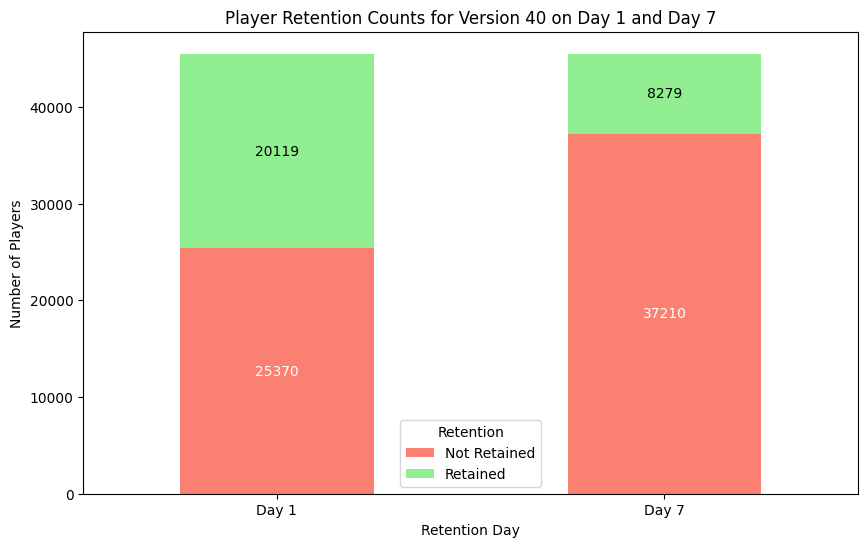

In [65]:
import pandas as pd
import matplotlib.pyplot as plt  # Import the necessary plotting library

# Assuming version_40_data is already defined as before
# Calculate retention counts for each day
retention_counts_40 = version_40_data[['retention_1', 'retention_7']].apply(pd.Series.value_counts).T
retention_counts_40.index = ['Day 1', 'Day 7']

# Plot the grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))
retention_counts_40.plot(kind='bar', stacked=True, color=['salmon', 'lightgreen'], ax=ax)
plt.xlabel("Retention Day")
plt.ylabel("Number of Players")
plt.title("Player Retention Counts for Version 40 on Day 1 and Day 7")
plt.xticks(rotation=0)
plt.legend(title="Retention", labels=["Not Retained", "Retained"])

# Add annotations to each bar segment
for i, day in enumerate(retention_counts_40.index):
    # Accessing 0 and 1 (corresponding to False and True in value_counts)
    not_retained_40 = retention_counts_40.loc[day, 0]  # for Not Retained (0)
    retained_40 = retention_counts_40.loc[day, 1]  # for Retained (1)
    
    # Not retained segment
    ax.text(i, not_retained_40 / 2, str(int(not_retained_40)), ha='center', va='center', color='white')
    
    # Retained segment
    ax.text(i, not_retained_40 + retained_40 / 2, str(int(retained_40)), ha='center', va='center', color='black')

plt.show()


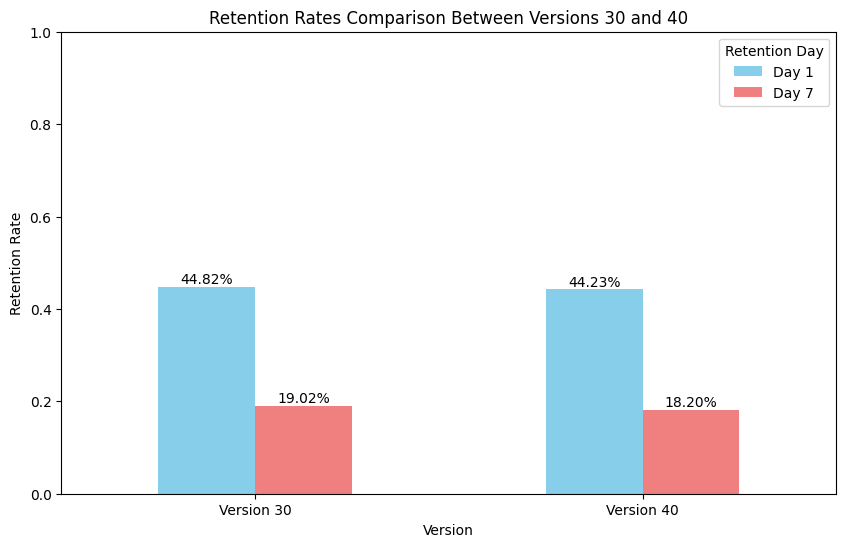

In [50]:
# Create DataFrame for retention rates comparison
retention_df = pd.DataFrame({
    'Day 1': [retention_30[0], retention_40[0]],
    'Day 7': [retention_30[1], retention_40[1]]
}, index=['Version 30', 'Version 40'])

# Plot grouped bar chart
ax = retention_df.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'lightcoral'])
plt.xlabel("Version")
plt.ylabel("Retention Rate")
plt.title("Retention Rates Comparison Between Versions 30 and 40")
plt.ylim(0, 1)  # Set y-axis from 0 to 100%
plt.legend(title="Retention Day")
plt.xticks(rotation=0)

# Add annotations for each bar
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2%}", 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10)

plt.show()


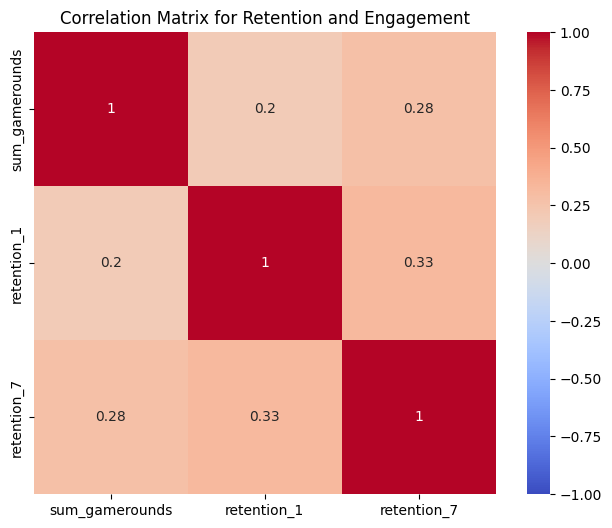

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare the data by converting `retention_1` and `retention_7` to binary values
# (True to 1, False to 0) for correlation analysis
data['retention_1'] = data['retention_1'].astype(int)
data['retention_7'] = data['retention_7'].astype(int)

# Calculate the correlation matrix
correlation_matrix = data[['sum_gamerounds', 'retention_1', 'retention_7']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, square=True)
plt.title("Correlation Matrix for Retention and Engagement")
plt.show()


In [ ]:
# Count the number of players with High Engagement
high_engagement_count = gamerounds_in_range[gamerounds_in_range['engagement_level'] == 'High Engagement'].shape[0]

print("Number of High Engagement players:", high_engagement_count)


Number of High Engagement players: 22029


In [84]:
# Group by 'engagement_level' and 'version', then count the number of players in each group
grouped_data = gamerounds_in_range_percentile.groupby(['engagement_level_percentile', 'version']).size().reset_index(name='player_count')

# Display the grouped data
print(grouped_data)


  engagement_level_percentile  version  player_count
0             High Engagement  gate_30         11271
1             High Engagement  gate_40         10758
2              Low Engagement  gate_30         10119
3              Low Engagement  gate_40         10604
4         Moderate Engagement  gate_30         10736
5         Moderate Engagement  gate_40         10930
6        Very High Engagement  gate_30         10636
7        Very High Engagement  gate_40         11140


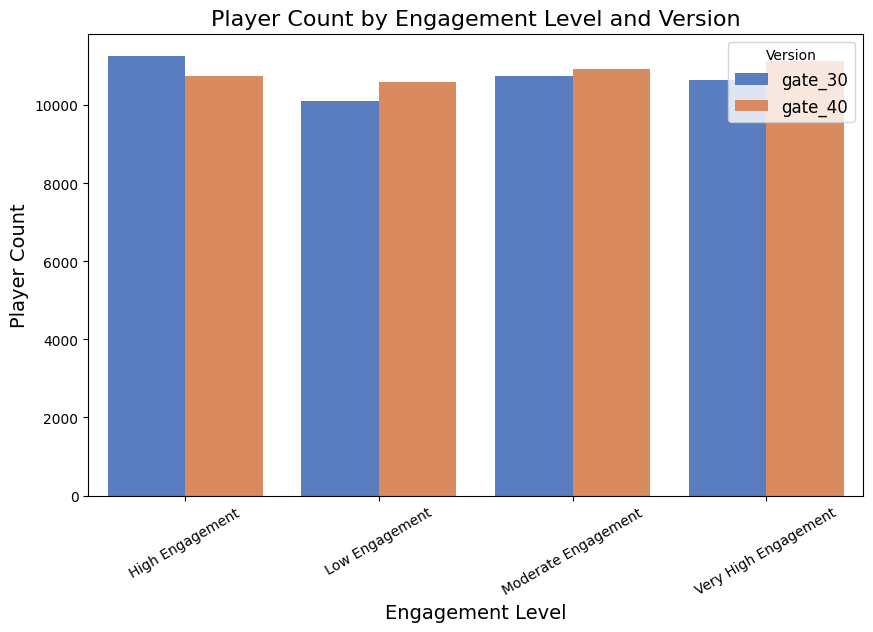

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot a bar chart with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(
    data=grouped_data, 
    x='engagement_level_percentile', 
    y='player_count', 
    hue='version', 
    palette='muted'
)

# Add titles and labels
plt.title('Player Count by Engagement Level and Version', fontsize=16)
plt.xlabel('Engagement Level', fontsize=14)
plt.ylabel('Player Count', fontsize=14)
plt.legend(title='Version', fontsize=12)
plt.xticks(rotation=30)  # Rotate x-axis labels for better readability
plt.show()


In [91]:
# Convert the boolean columns ('retention_1', 'retention_7') to 0/1
data['retention_1'] = data['retention_1'].astype(int)
data['retention_7'] = data['retention_7'].astype(int)

# Display the updated DataFrame
print(data)

        userid  version  sum_gamerounds  retention_1  retention_7
0          116  gate_30               3            0            0
1          337  gate_30              38            1            0
2          377  gate_40             165            1            0
3          483  gate_40               1            0            0
4          488  gate_40             179            1            1
...        ...      ...             ...          ...          ...
90184  9999441  gate_40              97            1            0
90185  9999479  gate_40              30            0            0
90186  9999710  gate_30              28            1            0
90187  9999768  gate_40              51            1            0
90188  9999861  gate_40              16            0            0

[90189 rows x 5 columns]


In [ ]:
# You can let Python decide, whether to apply a student's t-test for 
# normally distributed data or a Mann-Whitney U test for not-normally
# distributed data:

if norm_A["normal"].values:
    print("Group A is normally distributed")
    # ttest
    test_result = .ttest(Group_A, Group_B, paired=False)
    test_type="ttest"
else:
    print("Group A is not normally distributed")
    # mwu test
    test_result = pg.mwu(Group_A, Group_B)
    test_type="mwu" # can be further used e.g. for an 
                    # additional print-out
test_result

Chi-Square Statistic: 31.4933296996531
P-value: 6.691845341545989e-07
Degrees of Freedom: 3
Significant association between engagement level and version.


In [90]:
from scipy.stats import ttest_ind

# Assuming 'gamerounds_in_range' is your DataFrame after the boolean conversion
# First, let's assign numeric labels to the 'version' column (if not already numeric)
gamerounds_in_range_percentile['version_numeric'] = gamerounds_in_range_percentile['version'].apply(lambda x: 1 if x == 'gate_30' else 2)

# Loop through each unique engagement level
for level in gamerounds_in_range_percentile['engagement_level_percentile'].unique():
    # Subset data for this engagement level
    level_data = [gamerounds_in_range_percentile['engagement_level_percentile'] == level]
    
    # Separate data by version (using numeric version)
    version_1 = level_data[level_data['version_numeric'] == 1]['sum_gamerounds']
    version_2 = level_data[level_data['version_numeric'] == 2]['sum_gamerounds']

    # Perform Welch's t-test
    t_stat, p_val = ttest_ind(version_1, version_2, equal_var=False)  # Welch's t-test
    print(f"{level} - T-Statistic: {t_stat}, P-Value: {p_val}")
    
    # Check if the p-value is significant
    if p_val < 0.05:
        print(f"Significant difference in player counts for {level} between versions.")
    else:
        print(f"No significant difference in player counts for {level} between versions.")


TypeError: list indices must be integers or slices, not str

In [19]:
# Group by engagement_level and version, and calculate mean sum_gamerounds and retention values
grouped_data = gamerounds_in_range.groupby(['engagement_level', 'version_numeric']).agg({
    'sum_gamerounds': 'mean', 
    'retention_1': 'mean',
    'retention_7': 'mean'
}).reset_index()

# Print out the grouped data for better understanding
print(grouped_data)

# Now, for each engagement level, find the version with the highest sum_gamerounds
# and also compare the retention values
for level in ['Low Engagement', 'High Engagement']:
    # Subset the data for the given engagement level
    level_data = grouped_data[grouped_data['engagement_level'] == level]
    
    # Find the version with the highest average sum_gamerounds
    best_version_gamerounds = level_data.loc[level_data['sum_gamerounds'].idxmax()]
    
    # Find the version with the highest retention_1 and retention_7 (for both 1-day and 7-day retention)
    best_version_retention_1 = level_data.loc[level_data['retention_1'].idxmax()]
    best_version_retention_7 = level_data.loc[level_data['retention_7'].idxmax()]
    
    # Print out the results
    print(f"\nFor {level}:")
    print(f"  Better Version based on Gamerounds: {'gate_30' if best_version_gamerounds['version_numeric'] == 1 else 'gate_40'}")
    print(f"    Average Sum of Gamerounds: {best_version_gamerounds['sum_gamerounds']}")
    
    print(f"  Better Version based on Retention (1-day): {'gate_30' if best_version_retention_1['version_numeric'] == 1 else 'gate_40'}")
    print(f"    Average Retention 1-Day: {best_version_retention_1['retention_1']}")
    
    print(f"  Better Version based on Retention (7-day): {'gate_30' if best_version_retention_7['version_numeric'] == 1 else 'gate_40'}")
    print(f"    Average Retention 7-Day: {best_version_retention_7['retention_7']}")


       engagement_level  version_numeric  sum_gamerounds  retention_1  \
0       High Engagement                1       32.001863     0.617425   
1       High Engagement                2       31.532255     0.614891   
2        Low Engagement                1        3.855036     0.105252   
3        Low Engagement                2        3.801117     0.108374   
4   Moderate Engagement                1       12.675198     0.338605   
5   Moderate Engagement                2       12.664908     0.328429   
6  Very High Engagement                1      168.532061     0.866491   
7  Very High Engagement                2      165.942370     0.856284   

   retention_7  
0     0.155621  
1     0.140268  
2     0.016403  
3     0.017795  
4     0.054206  
5     0.048723  
6     0.575968  
7     0.552154  

For Low Engagement:
  Better Version based on Gamerounds: gate_30
    Average Sum of Gamerounds: 3.8550359712230216
  Better Version based on Retention (1-day): gate_40
    Average Retenti

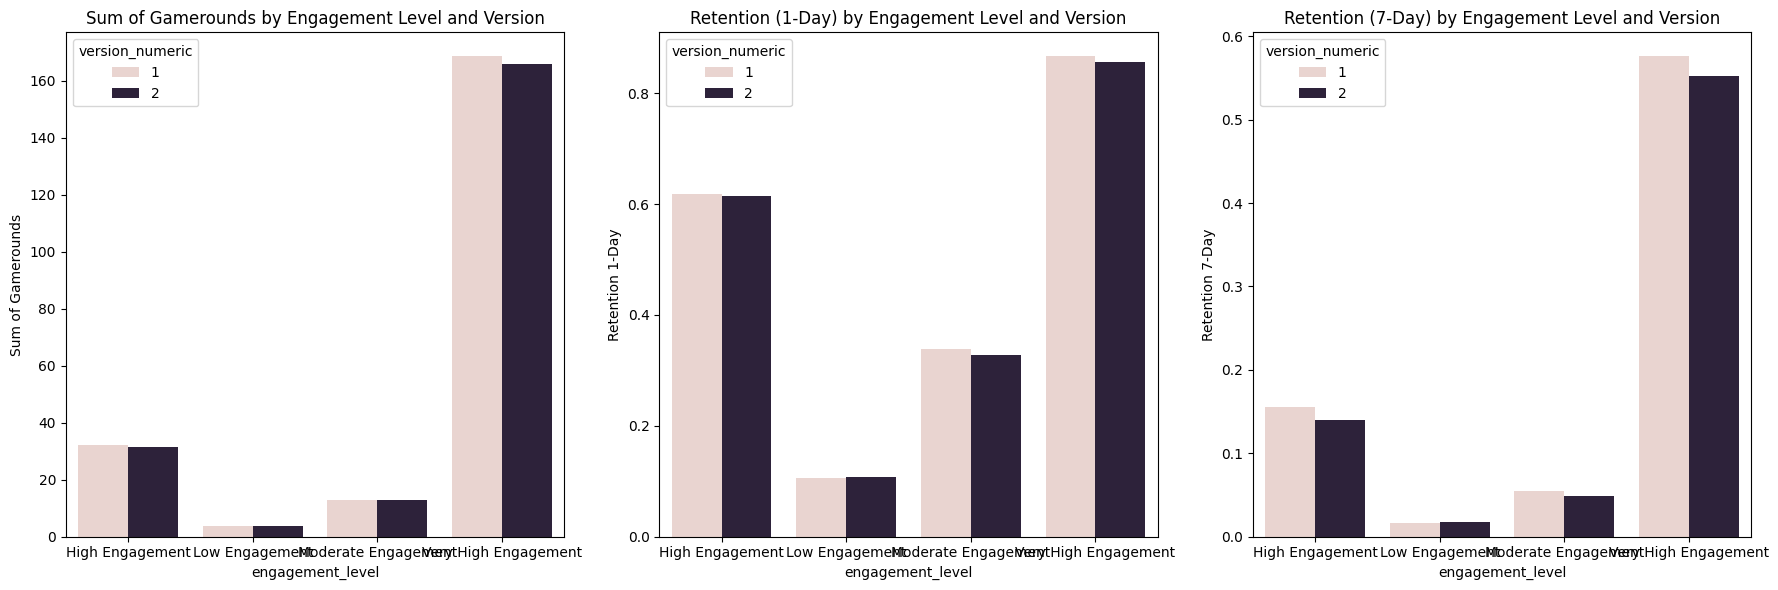

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming your dataframe is named 'df' (replace with your actual dataframe name)
# Sample data (your data is assumed to be in this format)
data = {
    'engagement_level': ['High Engagement', 'High Engagement', 'Low Engagement', 'Low Engagement', 
                         'Moderate Engagement', 'Moderate Engagement', 'Very High Engagement', 'Very High Engagement'],
    'version_numeric': [1, 2, 1, 2, 1, 2, 1, 2],
    'sum_gamerounds': [32.001863, 31.532255, 3.855036, 3.801117, 12.675198, 12.664908, 168.532061, 165.942370],
    'retention_1': [0.617425, 0.614891, 0.105252, 0.108374, 0.338605, 0.328429, 0.866491, 0.856284],
    'retention_7': [0.155621, 0.140268, 0.016403, 0.017795, 0.054206, 0.048723, 0.575968, 0.552154]
}

df = pd.DataFrame(data)

# Set up the figure with 3 subplots (one for each metric)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot for sum_gamerounds
sns.barplot(data=df, x='engagement_level', y='sum_gamerounds', hue='version_numeric', ax=axes[0])
axes[0].set_title('Sum of Gamerounds by Engagement Level and Version')
axes[0].set_ylabel('Sum of Gamerounds')

# Plot for retention_1
sns.barplot(data=df, x='engagement_level', y='retention_1', hue='version_numeric', ax=axes[1])
axes[1].set_title('Retention (1-Day) by Engagement Level and Version')
axes[1].set_ylabel('Retention 1-Day')

# Plot for retention_7
sns.barplot(data=df, x='engagement_level', y='retention_7', hue='version_numeric', ax=axes[2])
axes[2].set_title('Retention (7-Day) by Engagement Level and Version')
axes[2].set_ylabel('Retention 7-Day')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()
